# Análisis Exploratorio de Datos (EDA) y Experimentación

## Setup y Configuración


In [12]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Procesamiento de los datos

In [13]:
ruta = "../data/raw/"
archivo = "MeIA_2025_train.csv"

corpus = pd.read_csv(ruta + archivo, encoding="utf-8")
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review    5000 non-null   object 
 1   Polarity  5000 non-null   float64
 2   Town      5000 non-null   object 
 3   Region    5000 non-null   object 
 4   Type      5000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 195.4+ KB


In [3]:
corpus.head()

,Review,Polarity,Town,Region,Type
0,Un Restaurante te invita por su ambiente tan a...,2.0,Tlaquepaque,Jalisco,Restaurant
1,Pagamos 25 pesos por la entrada y no es gran c...,3.0,Bacalar,QuintanaRoo,Attractive
2,Mi esposa y yo nos alojamos en el Dreams por 4...,3.0,Tulum,QuintanaRoo,Hotel
3,"La única decepción puede no ser José Cuervo, p...",2.0,Tequila,Jalisco,Attractive
4,Cuando leí los comentarios sobre cómo son las ...,1.0,Isla_Mujeres,QuintanaRoo,Hotel


In [5]:
corpus.isnull().sum()

Review      0
Polarity    0
Town        0
Region      0
Type        0
dtype: int64

### Revision de los textos para detectar problemas de codificación

In [14]:
# Revisamos la lectura del dataset
print('0:',corpus.Review[0])
print('10:',corpus.Review[10])
print('100:',corpus.Review[100])


0: Un Restaurante te invita por su ambiente tan alegre,.pero al sentarte los meseros te apuran al tomar tu orden, y luego al llevarte tu orden se olvidan de ti.
La comida esta buena.
Hay estacionamiento.
Y no estaba lleno y aun asi nos descuidaron mucho....Más
10: Es emocionante entrar a un lugar lleno de color, incita a comer y te alegra el dia. Los precios son algo caros por que lo que sirven  y no tienen nada especial en sabor.
100: Cada 28 de diciembre mi familia y yo vamos a comer a este restaurante. Antes era muy bueno pero este año fue decepcionante. Mala atención al turismo nacional y local. Tienen mesas supuestamente reservadas para grupos  de tours de turistas extranjeros, que son las que...Más


Aparentemente el dataset ha sido cargado correctamente. Sin embargo, se detectan problemas de residuos de scrapings web mal hechos, donde alguien copió reseñas truncadas desde una interfaz que solo mostraba un resumen y luego un botón como “Leer más” o "Ver más", en concreto se observan patrones como "...Más" al final de ciertas reseñas.



### Limpieza de datos

In [17]:
import re 

def limpiar_truncamientos(texto):
# Variantes comunes al final de reseñas truncadas
    return re.sub(r'\.{2,}\s*Más\b.*', '', texto, flags=re.IGNORECASE)

def normalizar_espacios(texto):
    texto = texto.replace('\n', ' ')
    texto = re.sub(r'\s+', ' ', texto)
    return texto.strip()


corpus['Review'] = corpus['Review'].apply(limpiar_truncamientos)
corpus['Review'] = corpus['Review'].apply(normalizar_espacios)

In [18]:
print('0:',corpus.Review[0])
print('10:',corpus.Review[10])
print('100:',corpus.Review[100])

0: Un Restaurante te invita por su ambiente tan alegre,.pero al sentarte los meseros te apuran al tomar tu orden, y luego al llevarte tu orden se olvidan de ti. La comida esta buena. Hay estacionamiento. Y no estaba lleno y aun asi nos descuidaron mucho
10: Es emocionante entrar a un lugar lleno de color, incita a comer y te alegra el dia. Los precios son algo caros por que lo que sirven y no tienen nada especial en sabor.
100: Cada 28 de diciembre mi familia y yo vamos a comer a este restaurante. Antes era muy bueno pero este año fue decepcionante. Mala atención al turismo nacional y local. Tienen mesas supuestamente reservadas para grupos de tours de turistas extranjeros, que son las que


### Analisis de las variables objetivo del corpus

In [ ]:
# Variable Polarity
print(corpus['Polarity'].value_counts())


Polarity
5.0    1200
4.0    1100
3.0    1000
2.0     900
1.0     800
Name: count, dtype: int64


In [ ]:
# Variable Type
print(corpus['Type'].value_counts())

Type
Restaurant    2037
Hotel         1511
Attractive    1452
Name: count, dtype: int64


In [ ]:
# Variable Town
print(corpus['Town'].value_counts())

Town
Tulum                         961
Isla_Mujeres                  646
San_Cristobal_de_las_Casas    321
Valladolid                    269
Bacalar                       250
Palenque                      222
Sayulita                      207
Valle_de_Bravo                153
Tlaquepaque                   147
Taxco                         118
Tequisquiapan                 114
Patzcuaro                     110
Loreto                        110
Tepoztlan                     107
Teotihuacan                   104
Ajijic                        102
TodosSantos                    99
Metepec                        77
Orizaba                        74
Tequila                        74
Cholula                        73
Ixtapan_de_la_Sal              65
Bernal                         58
Huasca_de_Ocampo               51
Creel                          50
Atlixco                        48
Izamal                         47
Tepotzotlan                    39
Zacatlan                       36
Parras   

Limpiar Polarity y convertir a entero/clase
La columna es float64, con valores como 1.0, 2.0, 3.0 ...Cconviene tratarla como clase:

In [16]:
# Convertir a int si solo hay valores enteros y discretos
corpus['Polarity'] = corpus['Polarity'].astype(int)


In [17]:
corpus['Polarity'].value_counts()

Polarity
5    1200
4    1100
3    1000
2     900
1     800
Name: count, dtype: int64

### Distribucion de las Clases

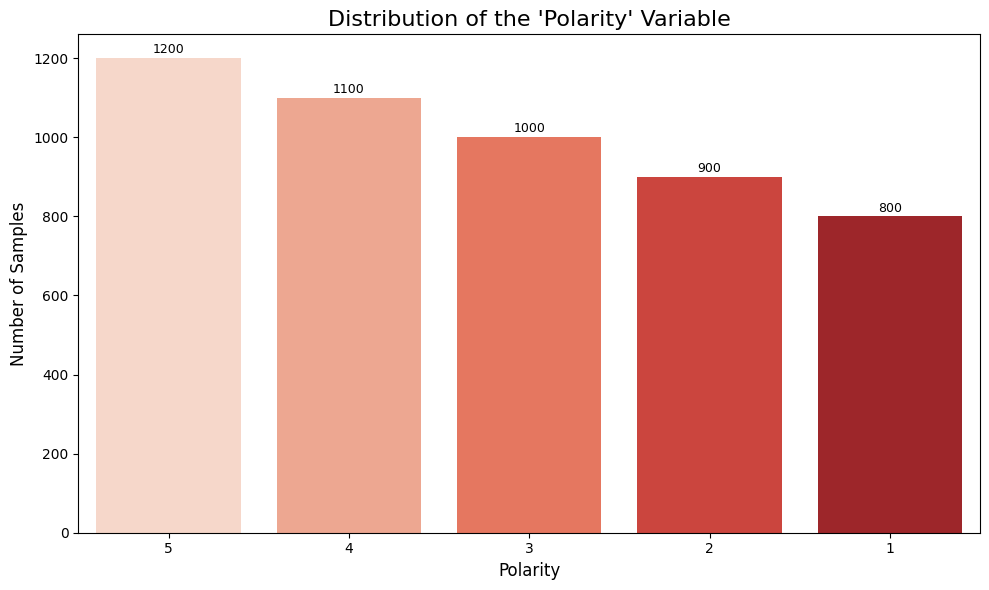

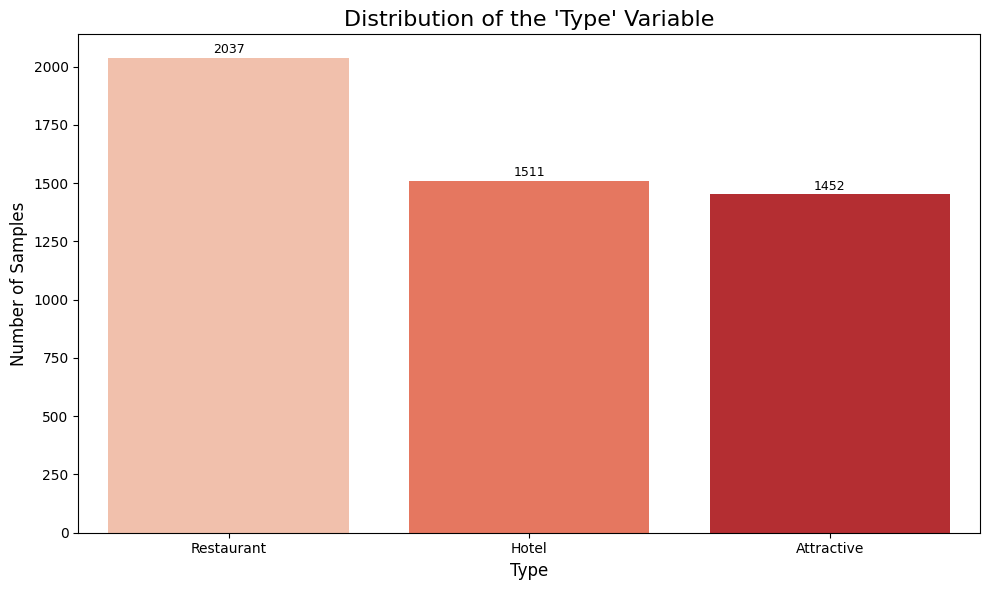

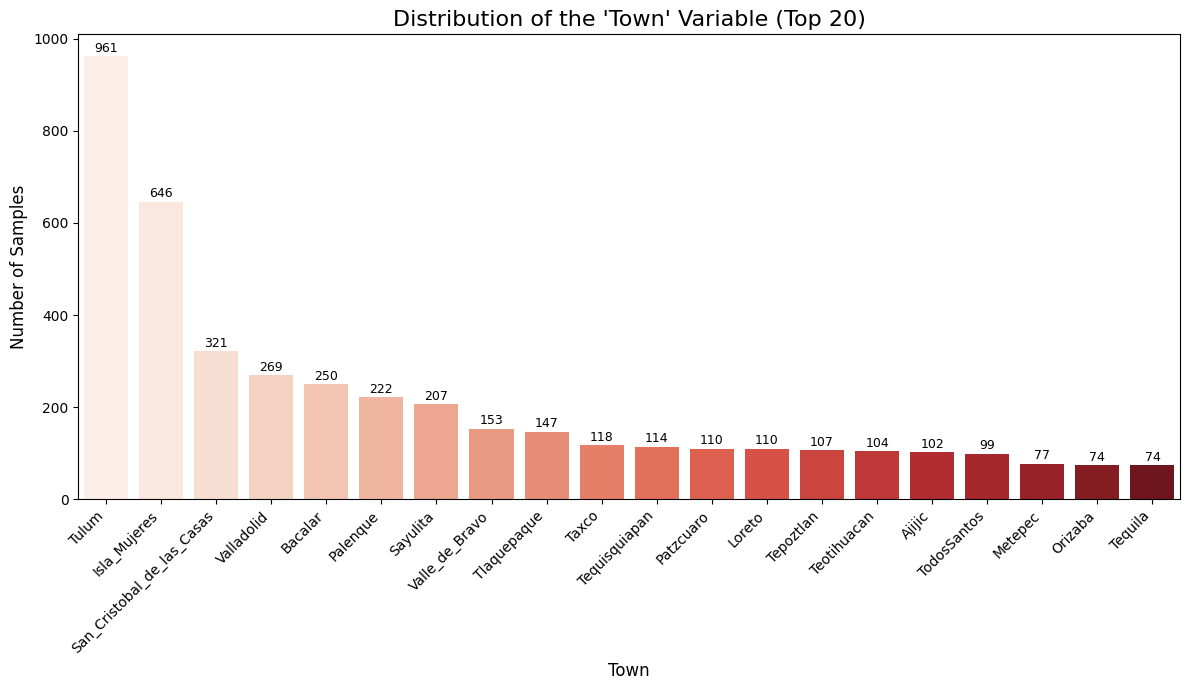

In [18]:
# Distribución de la variable 'Polarity'
paleta = "Reds"
polarity_counts = corpus['Polarity'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=polarity_counts.index.astype(str),
    y=polarity_counts.values,
    hue=polarity_counts.index.astype(str),
    palette=paleta,
    legend=False,
    ax=ax
)
ax.set_title("Distribution of the 'Polarity' Variable", fontsize=16)
ax.set_ylabel("Number of Samples", fontsize=12)
ax.set_xlabel("Polarity", fontsize=12)
for i, v in enumerate(polarity_counts.values):
    ax.text(i, v + max(polarity_counts.values)*0.01, str(v), color='black', ha='center', fontsize=9)
plt.tight_layout()
plt.show()
# Distribución de la variable 'Type'
paleta = "Reds"
type_counts = corpus['Type'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=type_counts.index.astype(str),
    y=type_counts.values,
    hue=type_counts.index.astype(str),
    palette=paleta,
    legend=False,
    ax=ax
)
ax.set_title("Distribution of the 'Type' Variable", fontsize=16)
ax.set_ylabel("Number of Samples", fontsize=12)
ax.set_xlabel("Type", fontsize=12)
for i, v in enumerate(type_counts.values):
    ax.text(i, v + max(type_counts.values)*0.01, str(v), color='black', ha='center', fontsize=9)
plt.tight_layout()
plt.show()
# Distribución de la variable 'Town' (Top 20)
paleta = "Reds"
town_counts = corpus['Town'].value_counts()
top_n_town = 20
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(
    x=town_counts.index[:top_n_town],
    y=town_counts.values[:top_n_town],
    hue=town_counts.index[:top_n_town],
    palette=paleta,
    legend=False,
    ax=ax
)
ax.set_title("Distribution of the 'Town' Variable (Top 20)", fontsize=16)
ax.set_ylabel("Number of Samples", fontsize=12)
ax.set_xlabel("Town", fontsize=12)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
for i, v in enumerate(town_counts.values[:top_n_town]):
    ax.text(i, v + max(town_counts.values[:top_n_town])*0.01, str(v), color='black', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# Conclusiones y puntos relevantes del Análisis Exploratorio

- El corpus fue cargado correctamente y contiene las columnas esperadas: `Review`, `Polarity`, `Type`, `Town` y `Region`.
- Se identificaron y corrigieron problemas de limpieza en los textos, principalmente residuos de scraping como reseñas truncadas con el patrón "...Más".
- No se detectaron valores nulos significativos en las variables principales.
- La variable `Polarity` fue convertida de float a entero para facilitar su uso como variable de clase en tareas de clasificación.
- La distribución de la variable `Polarity` muestra que algunas clases son más frecuentes que otras, lo que podría influir en el balance de los modelos.
- La variable `Type` presenta una distribución clara entre las categorías disponibles.
- La variable `Town` tiene alta diversidad, pero unas pocas localidades concentran la mayoría de las reseñas, presenta un alto desbalance de clases.
- El preprocesamiento inicial permitió dejar el corpus listo para el flujo del pipeline.